# 8.4 Gradient Descent with Momentum

## Preparation

In [1]:
# These are the libraries that will be used for this lab.

import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [2]:
# Plot the cubic

def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values 
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction 
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad() 
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, loss_list, 'ro', label='parameter values')
    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

In [3]:
# Plot the fourth order function and the parameter values

def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    
    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    plt.plot(parameter, loss_list, 'ro',label=paramlabel, color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

In [4]:
# Create a linear model
class one_param(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [5]:
# Create a one_param object
w = one_param(1, 1)

In [9]:
w.state_dict()

OrderedDict([('linear.weight', tensor([[-0.0075]]))])

## Saddle Points

In [6]:
# Define a function to output a cubic 
def cubic(yhat):
    return yhat ** 3

In [7]:
# Create a optimizer without momentum
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)

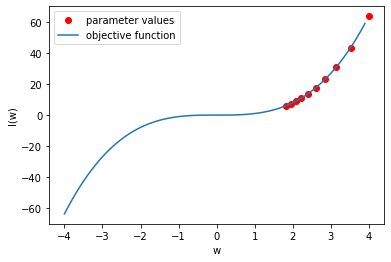

In [10]:
# Plot the model
plot_cubic(w, optimizer)

In [11]:
# Create a optimizer with momentum
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)

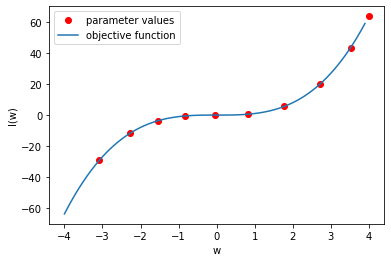

In [12]:
# Plot the model
plot_cubic(w, optimizer)